### Problem Statement:
1. Census-income data plays the most important role in the democratic system of government, highly affecting the economic sectors. Census-related figures are used to allocate federal funding by the government to different states and localities.
2.  The main aim is to increase awareness about how the income factor actually has an impact not only on the individual lives of citizens but also an effect on the nation and its betterment. You will have a look at the data pulled out from the 1994 Census bureau database, and try to find insights into how various features have an effect on the income of an individual.
3. The data contains approximately 32,000 observations with over 15 variables.
4. The strategy is to analyze the data and perform a predictive task of classification to predict whether an individual makes over 50K a year or less

In [1]:
#importing neccessary libraries
import numpy as np # for numerical operations 
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing the data
data = pd.read_csv('census-income1.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Description:
Column Names Description
1. Age -------------> Age of the individual
2. Workclass--------> department of the working individual
3. fnlwgt-----------> Final weight of the individual
4. education--------> The education degree of the individual
5. education-num ---> Number of years of education
6. marital-status---> Marital status of the individual
7. occupation-------> Occupation of the individual
8. relationship-----> Relation value
9. race-------------> Ethnicity of the individual
10. sex-------------> Female, Male
11. capital-gain----> capital gain of the individual
12. capital-loss----> capital loss of the individual
13. hours-per-week -> number of working hours
14. native-country--> The native country of the individual
15. Annual-Income---> Annual income either >50K or <=50K

In [3]:
#Extrating random sample from data 
data.sample(n=500)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
5292,21,Private,143604,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,<=50K
20966,47,Private,184402,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,<=50K
15479,51,Private,91137,9th,5,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
14454,36,Private,89040,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,47,United-States,<=50K
18626,35,Private,189382,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9767,39,Private,230467,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,1092,40,Germany,<=50K
13896,55,Private,182460,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,35,United-States,>50K
22533,48,Private,125892,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Poland,<=50K
18064,31,Private,127610,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,50,United-States,>50K


In [4]:
#shape
data.shape

(32561, 15)

In [5]:
#metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Cheaking the null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

Here it is showing that there are no null values but in sample of the data we can see some ? (question mark) in the data  

In [7]:
#again cheaking ? missing values 
data.isin(['?','unkown','N/A','NA','missing']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

As we can that there are nearly same no of missing values in occupation and workclass

In [8]:
# statistical description of numerical features 
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# dropping the null value 
data.drop(data[data['native-country'] == '?'].index,inplace = True)
data.drop(data[data["occupation"] == '?'].index,inplace = True)

In [10]:
data.isin(['?','unkown','N/A','NA','missing']).sum().sum()

0

In [11]:
# data after dropping null values 
data.shape

(30162, 15)

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [13]:
data = data.rename(columns = {'Unnamed: 14': 'Income'})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# cheaking the duplicate values 
data.duplicated().sum()

23

In [15]:
# dropping the duplicate values 
data = data.drop_duplicates()

In [16]:
data.shape

(30139, 15)

### Total % of population with income greater than 50K

In [17]:
#applied formula to find %
len(data[data['Income'] == '>50K'])/len(data) * 100

24.904608646604068

### how many samples of population are unmarried and working less than 20 hours

In [18]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [19]:
data['marital-status'].value_counts()

Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [20]:
len(data[(data['marital-status'] == 'Never-married') & (data['hours-per-week'] <20)])

781

In [21]:
print(data["native-country"].value_counts().idxmax())
print(data["native-country"].value_counts().idxmin())

United-States
Holand-Netherlands


#### Hours per week by country 

In [22]:
avg_hours_by_country = data.groupby('native-country')['hours-per-week'].mean().reset_index()
avg_hours_by_country = avg_hours_by_country.sort_values(by='hours-per-week', ascending = False)
avg_hours_by_country

,native-country,hours-per-week
36,Thailand,47.411765
9,France,46.370370
40,Yugoslavia,44.562500
34,South,44.464789
11,Greece,44.241379
19,Iran,44.071429
23,Japan,43.966102
8,England,42.476744
20,Ireland,42.416667
5,Dominican-Republic,42.283582


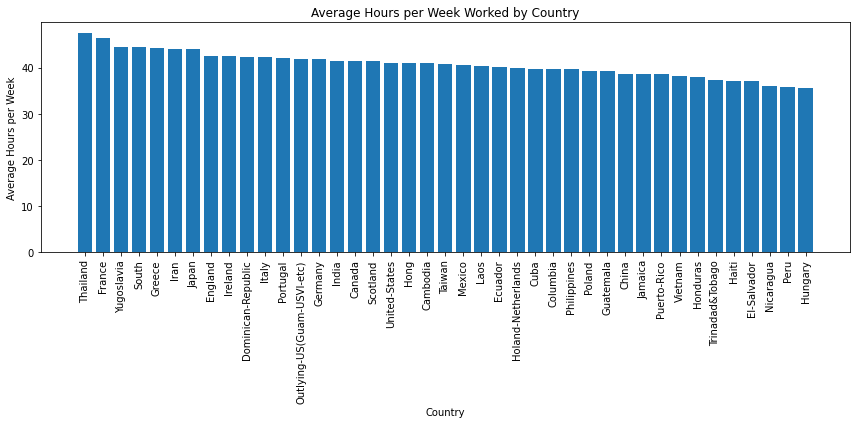

In [23]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(avg_hours_by_country['native-country'], avg_hours_by_country['hours-per-week'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Hours per Week')
plt.title('Average Hours per Week Worked by Country')
plt.tight_layout()
plt.show()


### Understanding how the average capital gain varies with the number of hours worked per week.

In [24]:
cp_hours_per_week = data.groupby('hours-per-week')['capital-gain'].mean().reset_index()
cp_hours_per_week = cp_hours_per_week.sort_values(by = 'hours-per-week', ascending = False)
cp_hours_per_week

,hours-per-week,capital-gain
93,99,871.282051
92,98,218.818182
91,97,0.000000
90,96,1537.600000
89,95,0.000000
...,...,...
4,5,117.789474
3,4,868.185185
2,3,1626.083333
1,2,1232.066667


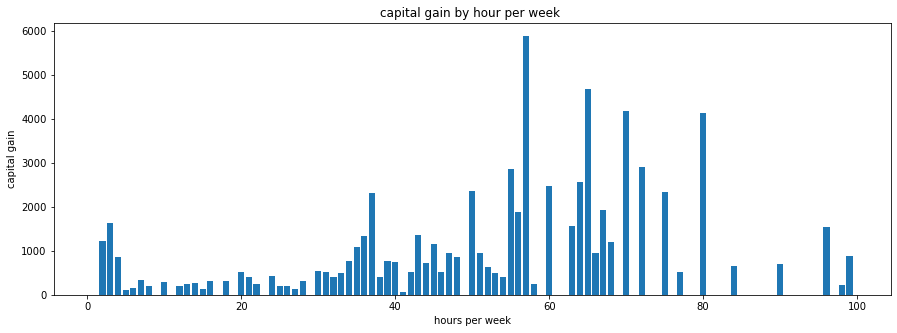

In [25]:
plt.figure(figsize = (15,5))
plt.bar(cp_hours_per_week['hours-per-week'], cp_hours_per_week['capital-gain'])
plt.xlabel('hours per week')
plt.ylabel('capital gain')
plt.title('capital gain by hour per week ')
plt.show()

#### we can see capital gain has peaks in between 50-80 hours per week

In [26]:
cp_hours_per_week.idxmax()

hours-per-week    93
capital-gain      56
dtype: int64

### Effect of hours per week on annual income

In [27]:
# Group by 'hours-per-week' and calculate the average 'Income'
avg_income_by_hrs = data.groupby('hours-per-week')['Income'].value_counts(normalize=True).unstack().fillna(0)
avg_income_by_hrs['Average_Income'] = (avg_income_by_hrs['>50K'] * 50 + avg_income_by_hrs['<=50K'] * 0)

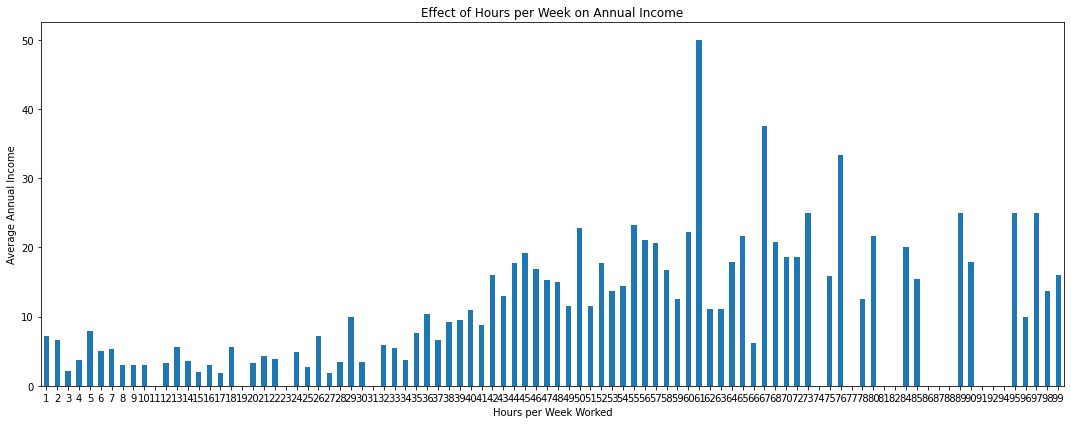

In [28]:
# Plot the results
plt.figure(figsize=(15, 6))
avg_income_by_hrs['Average_Income'].plot(kind='bar')
plt.xlabel('Hours per Week Worked')
plt.ylabel('Average Annual Income')
plt.title('Effect of Hours per Week on Annual Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

now finding that how much population Females have income greater than 50K

In [29]:
female_income_gr50k = (data[(data['sex'] == 'Female') & (data['Income'] == '>50K')]).value_counts().sum()

In [30]:
data['sex'].value_counts()

Male      20366
Female     9773
Name: sex, dtype: int64

In [31]:
data['Income'].value_counts()

<=50K    22633
>50K      7506
Name: Income, dtype: int64

In [32]:
female_income_gr50k/len(data) * 100

3.6895716513487504

 it is observed that only 3.6895716513487504 Females have income greater than 50k

#### which occupation have more no of 50k + income

In [33]:
high_income  = data[data['Income'] == '>50K' ]
high_income['occupation'].value_counts()

Exec-managerial      1937
Prof-specialty       1810
Sales                 970
Craft-repair          908
Adm-clerical          498
Transport-moving      319
Tech-support          278
Machine-op-inspct     244
Protective-serv       210
Other-service         132
Farming-fishing       115
Handlers-cleaners      83
Armed-Forces            1
Priv-house-serv         1
Name: occupation, dtype: int64

### occupation wise working hours 

In [34]:
data.groupby('occupation')['hours-per-week'].mean().reset_index().sort_values( by ='hours-per-week', ascending = False)

,occupation,hours-per-week
4,Farming-fishing,46.994934
3,Exec-managerial,44.970684
13,Transport-moving,44.650127
10,Protective-serv,42.846273
9,Prof-specialty,42.381011
2,Craft-repair,42.300870
11,Sales,40.763393
6,Machine-op-inspct,40.703666
1,Armed-Forces,40.666667
12,Tech-support,39.506037


In [38]:
data['Income'].value_counts()

<=50K    22633
>50K      7506
Name: Income, dtype: int64

In [36]:
selected_columns = ['occupation', 'hours-per-week', 'Income']
selected_data = data[selected_columns]
# Create a cross-tabulation (contingency table) of occupation vs. income
cross_tab = pd.crosstab(selected_data['occupation'], selected_data['Income'])
# Sort by the number of people with income >50K in descending order
cross_tab_sorted = cross_tab.sort_values(by='>50K', ascending=False)

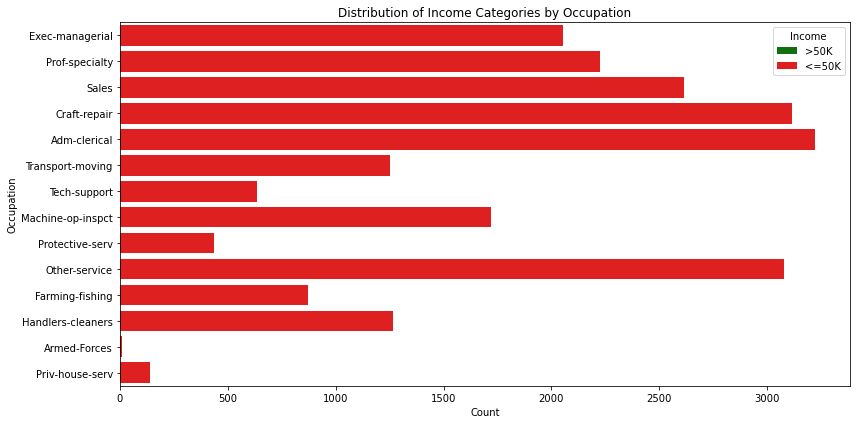

In [39]:
# Visualize the distribution of income categories by occupation
plt.figure(figsize=(12, 6))
sns.barplot(data=cross_tab_sorted, x='>50K', y=cross_tab_sorted.index, label='>50K', color='green')
sns.barplot(data=cross_tab_sorted, x='<=50K', y=cross_tab_sorted.index, label='<=50K', color='red')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distribution of Income Categories by Occupation')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

#### from above analysis we can conclude that people with occupation of farming and fishing have more no of working hours that other professions 

In [40]:
# Annual income by workclass
data.groupby(['workclass', 'Income']).size().reset_index(name='count')

,workclass,Income,count
0,Federal-gov,<=50K,578
1,Federal-gov,>50K,365
2,Local-gov,<=50K,1458
3,Local-gov,>50K,609
4,Private,<=50K,17390
5,Private,>50K,4874
6,Self-emp-inc,<=50K,474
7,Self-emp-inc,>50K,600
8,Self-emp-not-inc,<=50K,1784
9,Self-emp-not-inc,>50K,714


In [41]:
# encoding the object variable into numerical ones 
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['race'] = label_encoder.fit_transform(data['race'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])
data['Income'] = label_encoder.fit_transform(data['Income'])

In [44]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [45]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [46]:
data.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
age,1.000000,0.080480,-0.076279,-0.001159,0.043203,-0.276227,-0.005662,-0.246482,0.023858,0.081827,0.080162,0.060141,0.101348,-0.002339,0.242017
workclass,0.080480,1.000000,-0.032412,0.017818,0.037772,-0.034169,0.015622,-0.067394,0.044740,0.074939,0.035339,0.007185,0.050697,0.007580,0.018030
fnlwgt,-0.076279,-0.032412,1.000000,-0.027004,-0.045199,0.032119,-0.000022,0.009234,-0.024093,0.025602,0.000420,-0.009755,-0.023033,-0.066503,-0.008992
education,-0.001159,0.017818,-0.027004,1.000000,0.345312,-0.040678,-0.038176,-0.012923,0.011334,-0.027967,0.030617,0.015075,0.060440,0.078176,0.079039
education-num,0.043203,0.037772,-0.045199,0.345312,1.000000,-0.063254,0.087702,-0.092227,0.033018,0.006049,0.124455,0.079613,0.152842,0.090642,0.335413
marital-status,-0.276227,-0.034169,0.032119,-0.040678,-0.063254,1.000000,0.022529,0.178034,-0.068590,-0.119872,-0.042392,-0.035155,-0.188889,-0.025470,-0.193404
occupation,-0.005662,0.015622,-0.000022,-0.038176,0.087702,0.022529,1.000000,-0.053706,0.000735,0.062530,0.022151,0.014585,0.018428,-0.003380,0.051476
relationship,-0.246482,-0.067394,0.009234,-0.012923,-0.092227,0.178034,-0.053706,1.000000,-0.117116,-0.585031,-0.058285,-0.063601,-0.257748,-0.010942,-0.251026
race,0.023858,0.044740,-0.024093,0.011334,0.033018,-0.068590,0.000735,-0.117116,1.000000,0.089429,0.014371,0.023545,0.048549,0.124839,0.071689
sex,0.081827,0.074939,0.025602,-0.027967,0.006049,-0.119872,0.062530,-0.585031,0.089429,1.000000,0.048819,0.047008,0.231126,0.000284,0.216668


<AxesSubplot:>

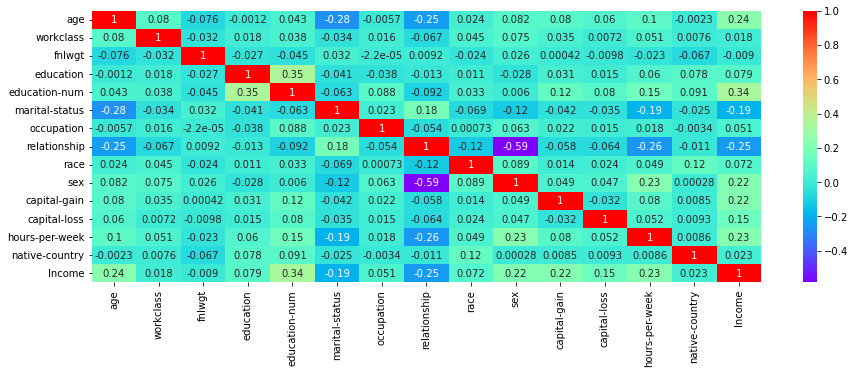

In [47]:
#correlation analysis 
plt.figure(figsize = (15,5))
sns.heatmap(data.corr(),cmap = 'rainbow', annot = True)

### from above heatmap we see no promimant correlation between the variables 

In [48]:
# scaling the data using standardscalar(z score)
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
# Fit and transform the selected features
standardized_features = scaler.fit_transform(data)

In [51]:
# Split the data into features (X) and target variable (y)
X = data.drop('Income', axis=1)
y = data['Income']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24111, 14)
(6028, 14)
(24111,)
(6028,)


In [55]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [57]:
# model creation 
model = RandomForestClassifier()

In [58]:
# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [54]:
# Get the best hyperparameters
best_params = random_search.best_params_

In [55]:
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [56]:
# Fit the model with the best hyperparameters
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8611479761114798


###  our model is giving 86.114% accuracy 